# NN 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import signal

In [ ]:
i_q = np.load("../Data/npy/input_array.npy")
state = np.load("../Data/npy/output_array.npy")
print("Data sample size: {}\nOutput size: {}".format(i_q.shape,state.shape))

In [ ]:
mini=i_q[:,:,0].min()
maxi=i_q[:,:,0].max()
print("maximum I value: {}\nminimum I value: {}".format(maxi,mini))
minq=i_q[:,:,1].min()
maxq=i_q[:,:,1].max()
print("maximum Q value: {}\nminimum Q value: {}".format(maxq,minq))

i_q[:,:,0]=(i_q[:,:,0]-mini)/(maxi-mini)
i_q[:,:,1]=(i_q[:,:,1]-minq)/(maxq-minq)

print("maximum I value: {}\nminimum I value: {}".format(i_q[:,:,0].max(),i_q[:,:,0].min()))
print("maximum Q value: {}\nminimum Q value: {}".format(i_q[:,:,1].max(),i_q[:,:,1].min()))


In [ ]:
data=train_test_split(i_q,state,test_size=0.3,random_state=42)
(trainData, testData) = data[:2]
(trainTargets, testTargets) = data[2:4]

In [ ]:
print(trainData.shape)
p_s=pd.DataFrame(state,index=None)
print(p_s.sum())

In [ ]:
np.save('../Data/splitData/trainData.npy',trainData)
np.save('../Data/splitData/testData.npy',testData)
np.save('../Data/splitData/trainTarget.npy',trainTargets)
np.save('../Data/splitData/testTarget.npy',testTargets)

In [ ]:
print(trainTargets[3])

In [ ]:
plt.figure(figsize=(4,3))
plt.xlabel('I')
plt.ylabel('Q')
plt.title("Signals")
plt.plot(trainData[1397,:,0], trainData[1397,:,1],label='|0>')
plt.plot(trainData[1398,:,0], trainData[1398,:,1],label='|1>')
plt.legend(loc='best')
plt.show()

# RNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
i_q = np.load("../Data/npy/input_array.npy")
state = np.load("../Data/npy/output_array.npy")
print("Data sample size: {}\nOutput size: {}".format(i_q.shape,state.shape))

Data sample size: (2000, 4096, 2)
Output size: (2000, 1)


In [ ]:
# Change the slide size according to configuration
# i_q=i_q[:,3::4,:]
i_q_slide=np.zeros(((i_q.shape[0]*1),1000,2))
state_slide=np.zeros((state.shape[0]*1,1))
print(i_q.shape)
count=0
for i in range(i_q.shape[0]):
    tmp_c=1
    sP,eP=800,1800
    while tmp_c<=1:
        i_q_slide[count]=i_q[i,sP:eP]
        sP+=1024
        eP+=1024
        tmp_c+=1
        state_slide[count]=state[i]
        count+=1
        # print(count,sP,eP,state[i])


In [ ]:
mini=i_q_slide[:,:,0].min()
maxi=i_q_slide[:,:,0].max()
print("maximum I value: {}\nminimum I value: {}".format(maxi,mini))
minq=i_q_slide[:,:,1].min()
maxq=i_q_slide[:,:,1].max()
print("maximum Q value: {}\nminimum Q value: {}".format(maxq,minq))

i_q_slide[:,:,0]=(i_q_slide[:,:,0]-mini)/(maxi-mini)
i_q_slide[:,:,1]=(i_q_slide[:,:,1]-minq)/(maxq-minq)

print("maximum I value: {}\nminimum I value: {}".format(i_q_slide[:,:,0].max(),i_q_slide[:,:,0].min()))
print("maximum Q value: {}\nminimum Q value: {}".format(i_q_slide[:,:,1].max(),i_q_slide[:,:,1].min()))

In [ ]:
data=train_test_split(i_q_slide,state_slide,test_size=0.2,random_state=42)
(trainData, testData) = data[:2]
(trainTargets, testTargets) = data[2:4]

In [ ]:
print(trainTargets.shape)
p_s=pd.DataFrame(trainTargets,index=None)
print(p_s,p_s.sum())

In [ ]:
plt.figure(figsize=(4,3))
plt.xlabel('I')
plt.ylabel('Q')
plt.title("Signals")
plt.plot(trainData[0,0:7,0], trainData[0,0:7,1],label='|0>')
plt.plot(trainData[1,0:7,0], trainData[1,0:7,1],label='|1>')
plt.legend(loc='best')
plt.show()

In [ ]:
np.save('../Data/rnn_splitData/trainData.npy',trainData)
np.save('../Data/rnn_splitData/testData.npy',testData)
np.save('../Data/rnn_splitData/trainTarget.npy',trainTargets)
np.save('../Data/rnn_splitData/testTarget.npy',testTargets)

# Spectrogram CRNN

In [ ]:
from scipy import signal

In [ ]:
spectrogram=np.zeros((i_q_slide.shape[0],129,49,2))
state_info=np.zeros((state_slide.shape[0],1))
for i in range(i_q_slide.shape[0]):
    frequency,time,spectrum1=signal.spectrogram(i_q_slide[i,:,0],nfft=256,fs=500000,window=signal.windows.hamming(256),noverlap=240,mode='magnitude')
    frequency,time,spectrum2=signal.spectrogram(i_q_slide[i,:,1],nfft=256,fs=500000,window=signal.windows.hamming(256),noverlap=240,mode='magnitude')
    spectrogram[i,:,:,0]=spectrum1
    spectrogram[i,:,:,1]=spectrum2
    state_info[i]=state_slide[i]

In [ ]:
data=train_test_split(spectrogram,state_info,test_size=0.2,random_state=42)
(trainData, testData) = data[:2]
(trainTargets, testTargets) = data[2:4]
print(trainData.shape)
p_s=pd.DataFrame(trainTargets,index=None)
print(p_s,p_s.sum())

In [ ]:
np.save('../Data/cnn_splitData/trainData.npy',trainData)
np.save('../Data/cnn_splitData/testData.npy',testData)
np.save('../Data/cnn_splitData/trainTarget.npy',trainTargets)
np.save('../Data/cnn_splitData/testTarget.npy',testTargets)

In [ ]:
plt.pcolormesh(time, frequency, trainData[0,:,:,0], shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('I compontent of signal for state 0')
plt.show()

plt.pcolormesh(time, frequency,trainData[1,:,:,0], shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('I compontent of signal for state 1')
plt.show()

# New Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
i_q = np.load('../Data/readout_ml/ttraj_10000_input_0/arr_0.npy')
state = np.load('../Data/readout_ml/ttraj_10000_output_0/arr_0.npy')
for i in range(1,3):
    pathd='../Data/readout_ml/ttraj_10000_input_'+str(i)+'/arr_0.npy'
    paths='../Data/readout_ml/ttraj_10000_output_'+str(i)+'/arr_0.npy'
    i_q=np.concatenate((i_q,np.load(pathd)))
    state = np.concatenate((state,np.load(paths)))

print("Data sample size: {}\nOutput size: {}".format(i_q.shape,state.shape))

Data sample size: (60000, 1024, 2)
Output size: (60000,)


In [3]:
i_q_slide=np.zeros(((i_q.shape[0]*1),1024,2))
state_slide=np.zeros((state.shape[0]*1,1))
count=0
for i in range(i_q.shape[0]):
    tmp_c=1
    sP,eP=0,1024
    while tmp_c<=1:
        i_q_slide[count]=i_q[i,sP:eP]
        sP+=256
        eP+=256
        tmp_c+=1
        state_slide[count]=state[i]
        count+=1
        # print(count,sP,eP,state[i])

In [4]:
mini=i_q_slide[:,:,0].min()
maxi=i_q_slide[:,:,0].max()
print("maximum I value: {}\nminimum I value: {}".format(maxi,mini))
minq=i_q_slide[:,:,1].min()
maxq=i_q_slide[:,:,1].max()
print("maximum Q value: {}\nminimum Q value: {}".format(maxq,minq))

i_q_slide[:,:,0]=(i_q_slide[:,:,0]-mini)/(maxi-mini)
i_q_slide[:,:,1]=(i_q_slide[:,:,1]-minq)/(maxq-minq)

print("maximum I value: {}\nminimum I value: {}".format(i_q_slide[:,:,0].max(),i_q_slide[:,:,0].min()))
print("maximum Q value: {}\nminimum Q value: {}".format(i_q_slide[:,:,1].max(),i_q_slide[:,:,1].min()))

maximum I value: 18215.0
minimum I value: -18278.0
maximum Q value: 19909.0
minimum Q value: -18346.0
maximum I value: 1.0
minimum I value: 0.0
maximum Q value: 1.0
minimum Q value: 0.0


In [5]:
data=train_test_split(i_q_slide,state_slide,test_size=0.2,random_state=42)
(trainData, testData) = data[:2]
(trainTargets, testTargets) = data[2:4]

In [6]:
print(trainTargets.shape)
p_s=pd.DataFrame(trainTargets,index=None)
print(p_s,p_s.sum())

(48000, 1)
         0
0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
...    ...
47995  1.0
47996  1.0
47997  0.0
47998  1.0
47999  1.0

[48000 rows x 1 columns] 0    23949.0
dtype: float64


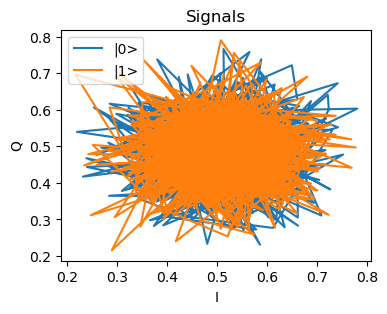

In [7]:
plt.figure(figsize=(4,3))
plt.xlabel('I')
plt.ylabel('Q')
plt.title("Signals")
plt.plot(trainData[0,:,0], trainData[0,0:,1],label='|0>')
plt.plot(trainData[1,0:,0], trainData[1,0:,1],label='|1>')
plt.legend(loc='best')
plt.show()

In [8]:
np.save('../Data/new_splitData/trainData.npy',trainData)
np.save('../Data/new_splitData/testData.npy',testData)
np.save('../Data/new_splitData/trainTarget.npy',trainTargets)
np.save('../Data/new_splitData/testTarget.npy',testTargets)

# 2 GSPS Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
x1 = np.load("../Data/hd_data/test_decimator0_state0/arr_0.npy")
y1 = np.zeros((x1.shape[0],1),dtype=int)
x2 = np.load("../Data/hd_data/test_decimator0_state1/arr_0.npy")
y2 = np.ones((x1.shape[0],1),dtype=int)
i_q=np.concatenate((x1,x2),axis=0)
state=np.concatenate((y1,y2),axis=0)
print("Data sample size: {}\nOutput size: {}".format(i_q.shape,state.shape))

Data sample size: (2000, 16384)
Output size: (2000, 1)


In [8]:
i_q_slide=np.zeros(((i_q.shape[0]*1),3000))
state_slide=np.zeros((state.shape[0]*1,1))
print(i_q.shape,"\n", i_q_slide.shape)
count=0
for i in range(i_q.shape[0]):
    tmp_c=1
    sP,eP=1400,4400
    while tmp_c<=1:
        i_q_slide[count]=i_q[i,sP:eP]
        sP+=1024
        eP+=1024
        tmp_c+=1
        state_slide[count]=state[i]
        count+=1
        # print(count,sP,eP,state[i])

(2000, 16384) 
 (2000, 3000)


In [9]:
mini=i_q_slide.min()
maxi=i_q_slide.max()
print("maximum I value: {}\nminimum I value: {}".format(maxi,mini))
i_q_slide=(i_q_slide-mini)/(maxi-mini)
print("maximum I value: {}\nminimum I value: {}".format(i_q_slide.max(),i_q_slide.min()))


maximum I value: 10968.0
minimum I value: -9356.0
maximum I value: 1.0
minimum I value: 0.0


In [10]:
data=train_test_split(i_q_slide,state_slide,test_size=0.2,random_state=42)
(trainData, testData) = data[:2]
(trainTargets, testTargets) = data[2:4]
print(trainTargets.shape)
p_s=pd.DataFrame(trainTargets,index=None)
print(p_s,p_s.sum())

(1600, 1)
        0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
1595  1.0
1596  1.0
1597  0.0
1598  1.0
1599  1.0

[1600 rows x 1 columns] 0    799.0
dtype: float64


In [6]:
l=[]
l.append(np.sum(i_q[4,0:1000])/1000)
l.append(np.sum(i_q[4,1000:2000])/1000)
l.append(np.sum(i_q[4,2000:3000])/1000)
l.append(np.sum(i_q[4,3000:4000])/1000)
l.append(np.sum(i_q[4,4000:5000])/1000)
l.append(np.sum(i_q[4,5000:6000])/1000)
l.append(np.sum(i_q[4,6000:7000])/1000)
l.append(np.sum(i_q[4,7000:8000])/1000)
print(l)


[0.522, 44.008, 54.6, 36.064, -123.808, -37.764, -59.68, -13.1]


In [11]:
np.save('../Data/julyData/trainData.npy',trainData)
np.save('../Data/julyData/testData.npy',testData)
np.save('../Data/julyData/trainTarget.npy',trainTargets)
np.save('../Data/julyData/testTarget.npy',testTargets)